# Dataset verification 

The purpose of this notebook is to be able to check whether the correct data has been produced for a given dataset config file.

In [1]:
import os
import pathlib
import datetime
import json

In [2]:
import pandas

In [3]:
import iris
import iris.quickplot
import cartopy
import cartopy.crs

In [4]:
import matplotlib
import matplotlib.pyplot

In [5]:
import xarray

In [6]:
import drivers

### Load in config and dataset


In [7]:
configs_dir = pathlib.Path(os.environ['HOME']) / 'prog' / 'precip_rediagnosis' / 'data_prep' / 'event_configs'
configs_dir.is_dir(), configs_dir

(True,
 PosixPath('/home/h01/shaddad/prog/precip_rediagnosis/data_prep/event_configs'))

In [8]:
config_path = configs_dir  / '2020_storm_dennis.json'
print(config_path.is_file())
with open(config_path) as config_file:
    dataset_config = json.load(config_file)
dataset_config

True


{'event_name': '202002_storm_dennis',
 'Event description': ' This is a large storm for which there was a lot of rainfall, with a red rainfall warning.',
 'science_info': ['https://www.metoffice.gov.uk/weather/warnings-and-advice/uk-storm-centre/storm-dennis',
  'https://www.metoffice.gov.uk/binaries/content/assets/metofficegovuk/pdf/weather/learn-about/uk-past-events/interesting/2020/2020_03_storm_dennis.pdf'],
 'event_start': '2020-02-14T18:00Z',
 'event_end': '2020-02-17T18:00Z',
 'target_time_delta': 6,
 'date_fname_template': '{start.year:04d}{start.month:02d}{start.day:02d}T{start.hour:02d}{start.minute:02d}Z_{end.year:04d}{end.month:02d}{end.day:02d}T{end.hour:02d}{end.minute:02d}Z',
 'fname_extension_grid': '.nc',
 'fname_extension_tabular': '.csv',
 'merge_vars': ['latitude', 'longitude', 'time'],
 'merged_output_prefix': 'prd_merged',
 'timezone': 'UTC',
 'data_sources': [{'data_type': 'radar',
   'dataset': 'radar',
   'data_extractor': 'RadarExtractor',
   'source_root': 'm

In [9]:
event_start_dt = datetime.datetime.strptime(dataset_config['event_start'], '%Y-%m-%dT%H:%MZ')
event_end_dt = datetime.datetime.strptime(dataset_config['event_end'], '%Y-%m-%dT%H:%MZ')
times_list = drivers.calc_dates_list(event_start_dt, event_end_dt, float(dataset_config['target_time_delta']))
final_timestamp = max(times_list)
event_start_dt, event_end_dt, final_timestamp

(datetime.datetime(2020, 2, 14, 18, 0),
 datetime.datetime(2020, 2, 17, 18, 0),
 datetime.datetime(2020, 2, 17, 18, 0, tzinfo=<UTC>))

In [10]:
start_datestring = f'{event_start_dt.year:04d}{event_start_dt.month:02d}{event_start_dt.day:02d}T{event_start_dt.hour:02d}{event_start_dt.minute:02d}Z'
end_datestring = f'{event_end_dt.year:04d}{event_end_dt.month:02d}{event_end_dt.day:02d}T{event_end_dt.hour:02d}{event_end_dt.minute:02d}Z'
final_datestring = f'{final_timestamp.year:04d}{final_timestamp.month:02d}{final_timestamp.day:02d}T{final_timestamp.hour:02d}{final_timestamp.minute:02d}Z'



In [15]:
root_data_dir = pathlib.Path('/project/informatics_lab/precip_rediagnosis')
dataset_version = 'train_20221216'
# root_data_dir = pathlib.Path('/scratch/shaddad/precip_rediagnosis')
prd_train_data = root_data_dir / dataset_version

In [16]:
event_data_dir = prd_train_data / dataset_config['event_name'] 
event_data_dir

PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis')

In [30]:
radar_subdir_name = 'radar'
mogrepsg_subdir_name = 'mogreps-g'

In [31]:
event_radar_path = event_data_dir / radar_subdir_name
event_mogrepsg_path = event_data_dir / mogrepsg_subdir_name

In [52]:
radar_regridded_fname = f'prd_radar_{start_datestring}_{final_datestring}.nc'
radar_df_fname = f'prd_radar_{start_datestring}_{final_datestring}.csv'
mogreps_g_df_fname = f'prd_mogreps_g_006H_{start_datestring}_{final_datestring}.csv'
merged_df_fname = f'prd_merged_{start_datestring}_{final_datestring}.csv'
mogreps_g_gridded_fname_template = 'prd_mg_ts_{timestep.year:04d}{timestep.month:02d}{timestep.day:02d}{timestep.hour:02d}{timestep.minute:02d}.nc'
(event_data_dir / merged_df_fname)

PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis/prd_merged_20200214T1800Z_20200217T1800Z.csv')

In [18]:
prd_merged_df = pandas.read_csv(event_data_dir / merged_df_fname)
prd_merged_df

,time,latitude,longitude,radar_max_rain_aggregate_3hr,radar_mean_rain_aggregate_3hr,radar_max_rain_instant,radar_mean_rain_instant,fraction_sum_agg,fraction_sum_instant,radar_fraction_in_band_aggregate_3hr_0.0,...,wind_speed_2750.0,wind_speed_3000.0,wind_speed_3250.0,wind_speed_3500.0,wind_speed_3750.0,wind_speed_4000.0,wind_speed_4500.0,wind_speed_5000.0,wind_speed_5500.0,wind_speed_6000.0
0,2020-02-14 18:00:00,49.40625,-5.484375,3.143229,2.235472,3.84375,0.313897,1.0,1.009412,0.0,...,22.7500,23.0625,23.6875,25.0000,26.9375,29.2500,31.5000,33.2500,33.0000,32.1250
1,2020-02-14 18:00:00,49.40625,-5.484375,3.143229,2.235472,3.84375,0.313897,1.0,1.009412,0.0,...,22.5000,22.2500,22.1250,22.3750,23.5000,25.8750,29.2500,30.8125,32.3750,32.0000
2,2020-02-14 18:00:00,49.40625,-5.484375,3.143229,2.235472,3.84375,0.313897,1.0,1.009412,0.0,...,23.0625,23.1875,23.6875,25.2500,27.4375,29.5625,30.1875,32.7500,33.5625,33.5000
3,2020-02-14 18:00:00,49.40625,-5.484375,3.143229,2.235472,3.84375,0.313897,1.0,1.009412,0.0,...,23.0625,23.2500,23.3750,24.1250,25.8750,28.5625,30.8750,31.4375,31.5625,31.4375
4,2020-02-14 18:00:00,49.40625,-5.484375,3.143229,2.235472,3.84375,0.313897,1.0,1.009412,0.0,...,22.3125,22.3750,23.0625,24.6250,26.6250,28.3750,30.7500,32.6875,32.5000,32.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347251,2020-02-17 18:00:00,58.78125,1.546875,0.000000,0.000000,0.00000,0.000000,1.0,1.000000,1.0,...,19.1250,19.0000,19.0000,19.1875,19.6250,20.1875,22.2500,24.2500,24.7500,25.3750
347252,2020-02-17 18:00:00,58.78125,1.546875,0.000000,0.000000,0.00000,0.000000,1.0,1.000000,1.0,...,21.0625,21.1875,21.3750,21.8125,22.5000,23.5000,26.5000,29.5625,31.0000,30.3125
347253,2020-02-17 18:00:00,58.78125,1.546875,0.000000,0.000000,0.00000,0.000000,1.0,1.000000,1.0,...,21.7500,21.5000,21.1875,20.6875,20.2500,19.9375,20.3125,21.0000,22.1875,23.8750
347254,2020-02-17 18:00:00,58.78125,1.546875,0.000000,0.000000,0.00000,0.000000,1.0,1.000000,1.0,...,17.8750,17.5000,17.3125,17.4375,17.8750,18.5000,20.8125,22.3125,22.2500,22.8125


### Data verification and visualisation
Check that the radar fractions add up to 1.0

In [19]:
agg_fraction_columns = [c1 for c1 in prd_merged_df.columns if 'agg' in c1 and 'radar_fraction' in c1]
instant_fraction_columns = [c1 for c1 in prd_merged_df.columns if 'instant' in c1 and 'radar_fraction' in c1]

In [20]:
(prd_merged_df[[c1 for c1 in prd_merged_df.columns if 'agg' in c1 and 'radar_fraction' in c1]].sum(axis='columns') > 0.9999).value_counts()

True    347256
dtype: int64

In [21]:
(prd_merged_df[[c1 for c1 in prd_merged_df.columns if 'instant' in c1 and 'radar_fraction' in c1]].sum(axis='columns')  > 0.9999).value_counts()

True    347256
dtype: int64

There are some bad values, so removing infeasibly high rain values.

In [ ]:
prd_merged_df = prd_merged_df[prd_merged_df['radar_max_rain_instant'] < 200]

In [ ]:
list(prd_merged_df.columns)

In [ ]:
fig1 = matplotlib.pyplot.figure(figsize=(16,20))
ax1 = fig1.add_subplot(2,1,1,title='Distribution of air temperature with height')
prd_merged_df.boxplot(column=[c1 for c1 in prd_merged_df.columns if 'temperature' in c1], ax=ax1, rot=90)
ax1 = fig1.add_subplot(2,1,2,title='Distribution of relative humidity with height')
prd_merged_df.boxplot(column=[c1 for c1 in prd_merged_df.columns if 'relative_humidity' in c1], ax=ax1, rot=90)

In [ ]:
prd_merged_df['radar_max_rain_instant'].min(), prd_merged_df['radar_max_rain_instant'].max()

In [ ]:
prd_merged_df['latitude'].min(), prd_merged_df['latitude'].max()

In [ ]:
prd_merged_df['longitude'].min(), prd_merged_df['longitude'].max()

In [ ]:
fig1 = matplotlib.pyplot.figure(figsize=(16,16))
ax1 = fig1.add_subplot(2,2,1)
prd_merged_df['radar_max_rain_aggregate_3hr'].plot.hist(ax=ax1)
ax1 = fig1.add_subplot(2,2,2)
prd_merged_df['radar_mean_rain_aggregate_3hr'].plot.hist(ax=ax1)
ax1 = fig1.add_subplot(2,2,3)
prd_merged_df['radar_max_rain_instant'].plot.hist(ax=ax1)
ax1 = fig1.add_subplot(2,2,4)
prd_merged_df['radar_mean_rain_instant'].plot.hist(ax=ax1)


In [ ]:
[c1 for c1 in prd_merged_df.columns if 'band' in c1 and 'instant' in c1]

In [ ]:
fig1 = matplotlib.pyplot.figure('histogram of fraction in rainfall bands', figsize=(10,30)) 
[c1 for c1 in prd_merged_df.columns if 'band' in c1 and 'instant' in c1]
cols_to_plot = [c1 for c1 in prd_merged_df.columns if 'band' in c1 and 'instant' in c1]
for ix1, c1 in enumerate(cols_to_plot):
    ax1 = fig1.add_subplot(5,1,ix1+1)
    _ = prd_merged_df[c1].plot.hist(bins=20,ax=ax1, log=True)

### Visualise the gridded data

In [53]:
timestep_list = [datetime.datetime.strptime(str(dt1), '%Y-%m-%dT%H:%M:%S.%f000') for dt1 in pandas.to_datetime(prd_merged_df['time']).unique()]
list(timestep_list )

[datetime.datetime(2020, 2, 14, 18, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 2, 15, 6, 0),
 datetime.datetime(2020, 2, 15, 12, 0),
 datetime.datetime(2020, 2, 15, 18, 0),
 datetime.datetime(2020, 2, 16, 0, 0),
 datetime.datetime(2020, 2, 16, 6, 0),
 datetime.datetime(2020, 2, 16, 12, 0),
 datetime.datetime(2020, 2, 16, 18, 0),
 datetime.datetime(2020, 2, 17, 0, 0),
 datetime.datetime(2020, 2, 17, 6, 0),
 datetime.datetime(2020, 2, 17, 12, 0),
 datetime.datetime(2020, 2, 17, 18, 0)]

In [57]:
mogrepsg_path_list = [event_mogrepsg_path / mogreps_g_gridded_fname_template.format(timestep=ts1) for ts1 in timestep_list]
mogrepsg_path_list


[PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis/mogreps-g/prd_mg_ts_202002141800.nc'),
 PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis/mogreps-g/prd_mg_ts_202002150000.nc'),
 PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis/mogreps-g/prd_mg_ts_202002150600.nc'),
 PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis/mogreps-g/prd_mg_ts_202002151200.nc'),
 PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis/mogreps-g/prd_mg_ts_202002151800.nc'),
 PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis/mogreps-g/prd_mg_ts_202002160000.nc'),
 PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis/mogreps-g/prd_mg_ts_202002160600.nc'),
 PosixPath('/project/informatics_lab/precip_rediagnosis/train_20221216/202002_storm_dennis

In [105]:
ts_index = 2
selecteded_mogrepsg_timestep = timestep_list[ts_index]
mogreps_g_ts_dataset = xarray.load_dataset(mogrepsg_path_list[ts_index])
mogreps_g_ts_dataset

<xarray.Dataset>
Dimensions:                                    (latitude: 52, longitude: 31,
                                                realization: 18, height: 33)
Coordinates:
  * latitude                                   (latitude) float32 49.22 ... 5...
  * longitude                                  (longitude) float32 -5.766 ......
  * realization                                (realization) int32 0 1 ... 16 17
  * height                                     (height) float32 5.0 ... 6e+03
    forecast_period                            timedelta64[ns] 06:00:00
    forecast_reference_time                    datetime64[ns] 2020-02-15
    time                                       datetime64[ns] 2020-02-15T06:0...
Data variables: (12/16)
    cloud_volume_fraction_in_atmosphere_layer  (realization, height, latitude, longitude) float32 ...
    latitude_longitude                         int32 -2147483647
    latitude_bnds                              (latitude) float32 49.12 ... 5...
    longitude_bnds                             (longitude) float32 -5.906 ......
    relative_humidity                          (realization, height, latitude, longitude) float32 ...
    air_pressure                               (realization, height, latitude, longitude) float32 ...
    ...                                         ...
    surface_altitude                           (realization, latitude, longitude) float32 ...
    air_pressure_at_sea_level                  (realization, latitude, longitude) float32 ...
    rainfall_rate                              (realization, latitude, longitude) float32 ...
    convective_rainfall_rate                   (realization, latitude, longitude) float32 ...
    lwe_snowfall_rate                          (realization, latitude, longitude) float32 ...
    lwe_convective_snowfall_rate               (realization, latitude, longitude) float32 ...
Attributes:
    history:                      2020-02-15T04:18:25Z: StaGE Decoupler
    institution:                  Met Office
    least_significant_digit:      2
    mosg__forecast_run_duration:  PT198H
    mosg__grid_domain:            global
    mosg__grid_type:              standard
    mosg__grid_version:           1.5.0
    mosg__model_configuration:    gl_ens
    source:                       Met Office Unified Model
    title:                        MOGREPS-G Model Forecast on Global 20 km St...
    um_version:                   11.2
    Conventions:                  CF-1.5, UKMO-1.0

In [22]:
radar_cubelist = iris.load(str(event_data_dir / 'radar' / radar_regridded_fname))
radar_cubelist

[<iris 'Cube' of num_radar_cells / (unknown) (latitude: 52; longitude: 31)>,
<iris 'Cube' of average rain in radar cells within mogreps-g cell / (mm) (time: 13; latitude: 52; longitude: 31)>,
<iris 'Cube' of average rain in radar cells within mogreps-g cell / (mm) (time: 13; latitude: 52; longitude: 31)>,
<iris 'Cube' of Sum of fractions for each cell for aggregate 3hr data / (mm) (time: 13; latitude: 52; longitude: 31)>,
<iris 'Cube' of Fraction radar rainfall cells in specified instant rain band / (unknown) (time: 13; latitude: 52; longitude: 31; band: 5)>,
<iris 'Cube' of maximum rain in radar cells within mogreps-g cell / (mm) (time: 13; latitude: 52; longitude: 31)>,
<iris 'Cube' of Sum of fractions for each cell for instant precip data / (mm) (time: 13; latitude: 52; longitude: 31)>,
<iris 'Cube' of maximum rain in radar cells within mogreps-g cell / (mm) (time: 13; latitude: 52; longitude: 31)>,
<iris 'Cube' of Fraction radar rainfall cells in specified 3hr aggregate rain band  / (unknown) (time: 13; latitude: 52; longitude: 31; band: 5)>]

In [103]:
[(c1.name(), c1.var_name) for c1 in radar_cubelist]

[('num_radar_cells', 'num_radar_cells'),
 ('average rain in radar cells within mogreps-g cell',
  'radar_mean_rain_instant'),
 ('average rain in radar cells within mogreps-g cell',
  'radar_mean_rain_aggregate_3hr'),
 ('Sum of fractions for each cell for aggregate 3hr data', 'fraction_sum_agg'),
 ('Fraction radar rainfall cells in specified instant rain band',
  'radar_fraction_in_band_instant'),
 ('maximum rain in radar cells within mogreps-g cell',
  'radar_max_rain_aggregate_3hr'),
 ('Sum of fractions for each cell for instant precip data',
  'fraction_sum_instant'),
 ('maximum rain in radar cells within mogreps-g cell',
  'radar_max_rain_instant'),
 ('Fraction radar rainfall cells in specified 3hr aggregate rain band ',
  'radar_fraction_in_band_aggregate_3hr')]

In [116]:
selected_ts_radar_cube = radar_cubelist.extract_cube('radar_mean_rain_instant').extract(iris.Constraint(time=selecteded_mogrepsg_timestep))

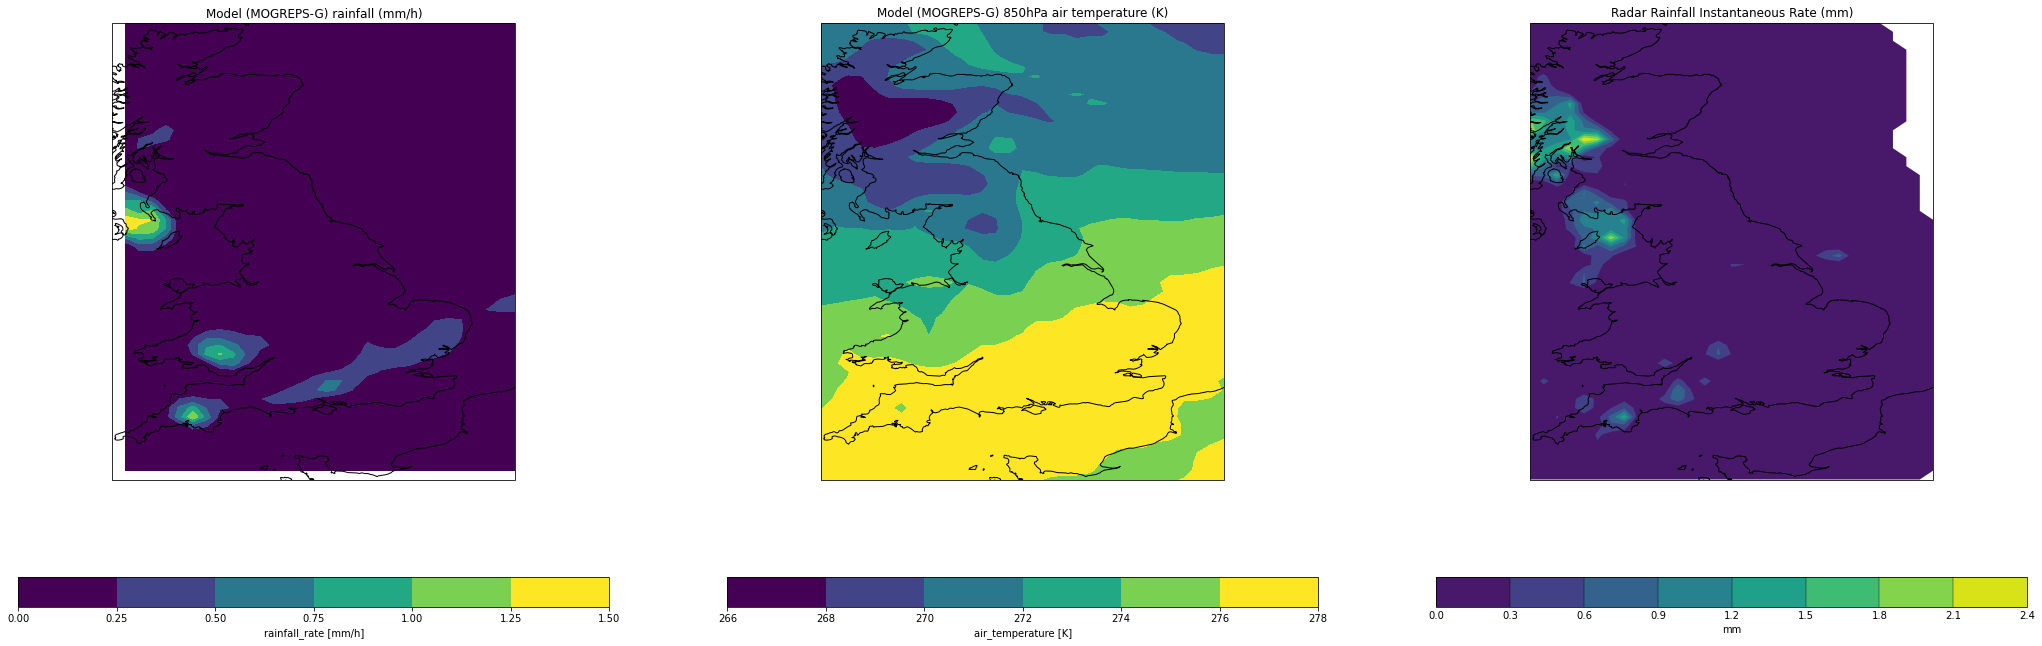

In [139]:
fig1 = matplotlib.pyplot.figure(figsize=(36,12))

ax1 = fig1.add_subplot(1,3,1, projection=cartopy.crs.PlateCarree())
mogreps_g_ts_dataset.rainfall_rate[0,:,:].plot.contourf(cbar_kwargs={'orientation': 'horizontal'})
ax1.coastlines()
_ = ax1.set_title('Model (MOGREPS-G) rainfall (mm/h)')

ax1 = fig1.add_subplot(1,3,2, projection=cartopy.crs.PlateCarree())
mogreps_g_ts_dataset.air_temperature[0,18,::,:].plot.contourf(cbar_kwargs={'orientation': 'horizontal'})
ax1.coastlines()
_ = ax1.set_title('Model (MOGREPS-G) 850hPa air temperature (K)')

ax1 = fig1.add_subplot(1,3,3,title='radar rainfall', projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(selected_ts_radar_cube)
ax1.coastlines()
_ = ax1.set_title('Radar Rainfall Instantaneous Rate (mm)')

fig1.savefig('/data/users/shaddad/precip_rediagnosis/plots/202301_esip_dataset.png',bbox_inches='tight')


In [134]:
[f'{float(h1.data):0.2f}' for h1 in mogreps_g_ts_dataset.height][18]

'1500.00'

In [112]:
iris.Constraint

iris._constraints.Constraint

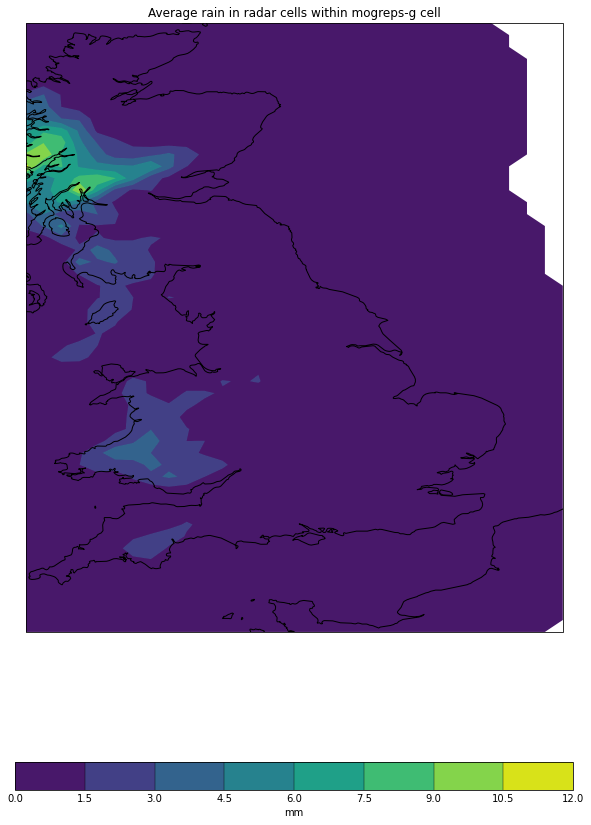

In [24]:
fig1 = matplotlib.pyplot.figure(figsize=(10,16))
iris.quickplot.contourf(radar_cubelist.extract_cube('radar_mean_rain_aggregate_3hr')[2], ) 
fig1.gca().coastlines()

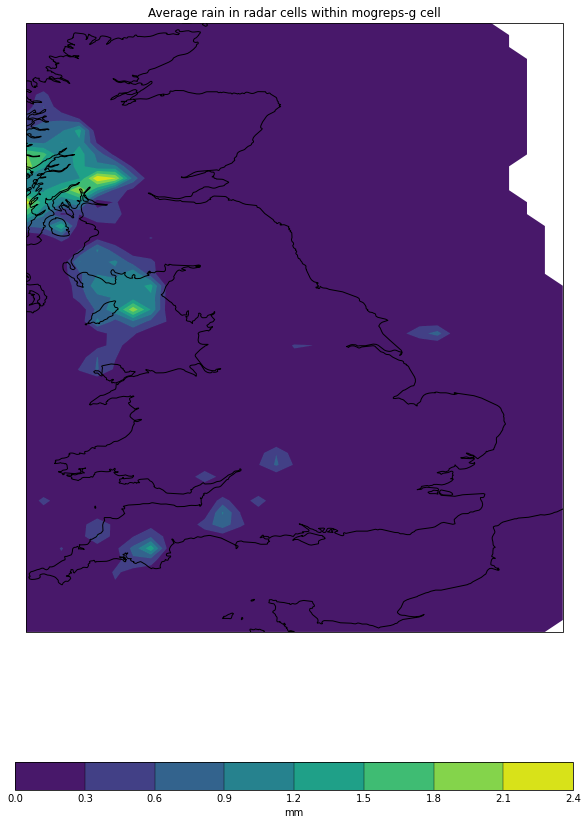

In [25]:
fig1 = matplotlib.pyplot.figure(figsize=(10,16))
iris.quickplot.contourf(radar_cubelist.extract_cube('radar_mean_rain_instant')[2], ) 
fig1.gca().coastlines()

In [ ]:
radar_cube_raw.extract(iris.Constraint(time= lambda c1: drivers.compare_time(times_list[2], c1.point) ))

In [ ]:
radar_cube_raw.extract(iris.Constraint(time= lambda c1: drivers.compare_time(times_list[2], c1.point) )).collapsed(['projection_x_coordinate', 'projection_y_coordinate'], iris.analysis.MAX).data

In [ ]:
radar_raw_to_plot = radar_cube_raw.extract(iris.Constraint(time= lambda c1: drivers.compare_time(times_list[2], c1.point) ))
radar_raw_to_plot

In [ ]:
fig1 = matplotlib.pyplot.figure(figsize=(24,24))
ax1 = fig1.add_subplot(1,1,1, projection=cartopy.crs.PlateCarree())
iris.plot.contourf(radar_raw_to_plot[300:1500,200:1450],
                   axes=ax1,
                   levels=[0.0,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.2, 1.5, 2.0, 3.0, 10.0],
                   cmap='viridis',
                  )
ax1.coastlines()

In [ ]:
mg_xrds = xarray.load_dataset(event_data_dir / 'mogreps-g' / 'prd_mg_ts_202002150600.nc')
mg_xrds

In [ ]:
fig1 = matplotlib.pyplot.figure(figsize=(20,16))
ax1 = fig1.add_subplot(2,2,1,projection=cartopy.crs.PlateCarree())
mg_xrds['rainfall_rate'][1,:,:].plot.contourf(ax=ax1)
ax1.coastlines()
ax1 = fig1.add_subplot(2,2,2,projection=cartopy.crs.PlateCarree())
mg_xrds['convective_rainfall_rate'][1,:,:].plot.contourf(ax=ax1)
ax1.coastlines()
ax1 = fig1.add_subplot(2,2,3,projection=cartopy.crs.PlateCarree())
mg_xrds['rainfall_rate'][2,:,:].plot.contourf(ax=ax1)
ax1.coastlines()
ax1 = fig1.add_subplot(2,2,4,projection=cartopy.crs.PlateCarree())
mg_xrds['convective_rainfall_rate'][2,:,:].plot.contourf(ax=ax1)
ax1.coastlines()

In [28]:
target_cube = iris.load_cube('/project/informatics_lab/precip_rediagnosis/target_cube.nc')
target_cube

<iris 'Cube' of rainfall_rate / (m s-1) (latitude: 52; longitude: 31)>

In [29]:
(min(target_cube.coord('latitude').points), 
 max(target_cube.coord('latitude').points),
 min(target_cube.coord('longitude').points), 
 max(target_cube.coord('longitude').points),
)

(49.21875, 58.78125, -5.765625, 2.671875)